# Insurance Fraud Claims Detection

In this notebook, I'm going to train the model with engineered data and selected features.

## Libraries and Enviroments

In [1]:
#Read the data
import numpy as np 
import pandas as pd

# Data Sciences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline

#Utils
import os

# Set notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.simplefilter(action='ignore')

In [2]:
raw = '../data/raw/insurance_claims.csv'
interim = '../data/interim/'
processed= '../data/processed/'
models= '../models/'

## Data Preparation

### Read Data

In [3]:
#For training
X_train = pd.read_csv(processed + 'X_train_final.csv')
y_train = pd.read_csv(processed + 'y_train_final.csv')

#For testing
X_test = pd.read_csv(processed + 'X_test_final.csv')
y_test = pd.read_csv(processed + 'y_test_final.csv')

In [4]:
print(X_train.shape)
print(y_train.shape)

(899, 55)
(899, 1)


In [5]:
print(X_test.shape)
print(y_test.shape)

(100, 55)
(100, 1)


### Load features

In [6]:
features = pd.read_csv(processed + 'selected_features.csv')
features = list(features['0'])

print(features)

['umbrella_limit', 'capital_gains', 'capital_loss', 'incident_severity', 'incident_hour_of_the_day', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'policy_deductable_group', 'policy_annual_premium_groups', 'insured_hobbies_chess', 'insured_hobbies_cross-fit', 'insured_hobbies_others']


### Filter for features selected

In [7]:
X_train = X_train[features]
X_test = X_test[features]

In [8]:
print(X_train.shape)
print(X_test.shape)

(899, 13)
(100, 13)


### Target distribution

In [9]:
print(y_train['fraud_reported'].value_counts()/len(y_train), '\n')

0    0.74861
1    0.25139
Name: fraud_reported, dtype: float64 



### Smote for balancing

In [10]:
X = pd.read_csv(processed + 'X_final.csv')
y = pd.read_csv(processed + 'y_final.csv')

In [11]:
smote = SMOTE(random_state=9)
X_syn, y_syn = smote.fit_resample(X, y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, random_state = 1)

In [13]:
print(y_train['fraud_reported'].value_counts()/len(y_train), '\n')

1    0.506206
0    0.493794
Name: fraud_reported, dtype: float64 



## Model Building

In [14]:
model_predictions = {}

### Logistic regression


********************
**Model Assessment**
********************
score: 0.678

Classification report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       195
           1       0.66      0.67      0.67       181

    accuracy                           0.68       376
   macro avg       0.68      0.68      0.68       376
weighted avg       0.68      0.68      0.68       376


Confusion Matrix


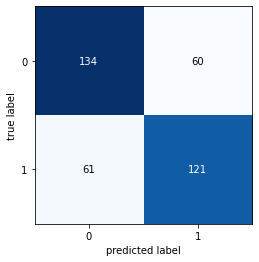

In [15]:
logit = LogisticRegression(random_state=8)

logit.fit(X_train, y_train)
predictions = logit.predict(X_test)

print()
print("*"*20)
print("Model Assessment".center(20, '*'))
print("*"*20)

predictions = logit.predict(X_test)
print('score: {}'.format(round(logit.score(X_test, y_test), 3)))
print()

print('Classification report')
print(classification_report(y_test, predictions))

print()

print('Confusion Matrix')
conf_matrix = confusion_matrix(predictions, y_test)
plot_confusion_matrix(conf_matrix);

tpr, fpr, threshold = roc_curve(predictions, y_test, pos_label=1)
model_predictions["Logistic Regression"] = [tpr, fpr]

### Support Vector Machine

********************
**Model Assessment**
********************
score: 0.883

Classification report
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       195
           1       0.86      0.91      0.88       181

    accuracy                           0.88       376
   macro avg       0.88      0.88      0.88       376
weighted avg       0.88      0.88      0.88       376


Confusion Matrix


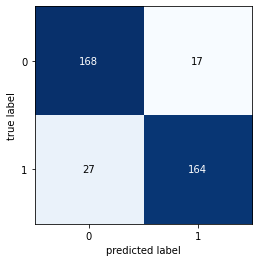

In [16]:
svc = SVC(random_state=8)

svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

print("*"*20)
print("Model Assessment".center(20, '*'))
print("*"*20)

predictions = svc.predict(X_test)
print('score: {}'.format(round(svc.score(X_test, y_test), 3)))
print()

print('Classification report')
print(classification_report(y_test, predictions))

print()

print('Confusion Matrix')
conf_matrix = confusion_matrix(predictions, y_test)
plot_confusion_matrix(conf_matrix);

tpr, fpr, threshold = roc_curve(predictions, y_test, pos_label=1)
model_predictions["SVM"] = [tpr, fpr]

### Decision Tree

********************
**Model Assessment**
********************
score: 0.838

Classification report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       195
           1       0.82      0.86      0.84       181

    accuracy                           0.84       376
   macro avg       0.84      0.84      0.84       376
weighted avg       0.84      0.84      0.84       376


Confusion Matrix


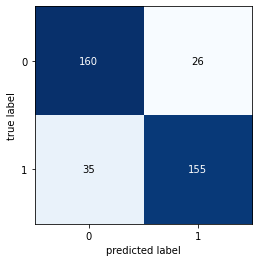

In [17]:
dtree = DecisionTreeClassifier(random_state=8)

dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print("*"*20)
print("Model Assessment".center(20, '*'))
print("*"*20)

predictions = dtree.predict(X_test)
print('score: {}'.format(round(dtree.score(X_test, y_test), 3)))
print()

print('Classification report')
print(classification_report(y_test, predictions))

print()

print('Confusion Matrix')
conf_matrix = confusion_matrix(predictions, y_test)
plot_confusion_matrix(conf_matrix);

tpr, fpr, threshold = roc_curve(predictions, y_test, pos_label=1)
model_predictions["Decision Tree"] = [tpr, fpr]

### Random Forest

********************
**Model Assessment**
********************
score: 0.907

Classification report
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       195
           1       0.89      0.92      0.91       181

    accuracy                           0.91       376
   macro avg       0.91      0.91      0.91       376
weighted avg       0.91      0.91      0.91       376


Confusion Matrix


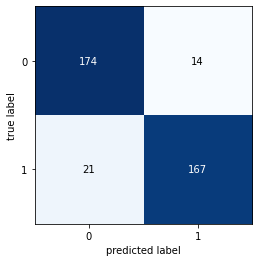

In [18]:
rfor = RandomForestClassifier(random_state=8)

rfor.fit(X_train, y_train)
predictions = rfor.predict(X_test)

print("*"*20)
print("Model Assessment".center(20, '*'))
print("*"*20)

predictions = rfor.predict(X_test)
print('score: {}'.format(round(rfor.score(X_test, y_test), 3)))
print()

print('Classification report')
print(classification_report(y_test, predictions))

print()

print('Confusion Matrix')
conf_matrix = confusion_matrix(predictions, y_test)
plot_confusion_matrix(conf_matrix);

tpr, fpr, threshold = roc_curve(predictions, y_test, pos_label=1)
model_predictions["Random Forest"] = [tpr, fpr]

### LightGB

********************
**Model Assessment**
********************
score: 0.886

Classification report
              precision    recall  f1-score   support

           0       0.93      0.85      0.88       195
           1       0.85      0.93      0.89       181

    accuracy                           0.89       376
   macro avg       0.89      0.89      0.89       376
weighted avg       0.89      0.89      0.89       376


Confusion Matrix


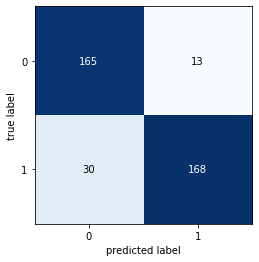

In [19]:
lgbm = LGBMClassifier(random_state=8)

lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

print("*"*20)
print("Model Assessment".center(20, '*'))
print("*"*20)

predictions = lgbm.predict(X_test)
print('score: {}'.format(round(lgbm.score(X_test, y_test), 3)))
print()

print('Classification report')
print(classification_report(y_test, predictions))

print()

print('Confusion Matrix')
conf_matrix = confusion_matrix(predictions, y_test)
plot_confusion_matrix(conf_matrix);

tpr, fpr, threshold = roc_curve(predictions, y_test, pos_label=1)
model_predictions["LightGBM"] = [tpr, fpr]

## Model Assessment

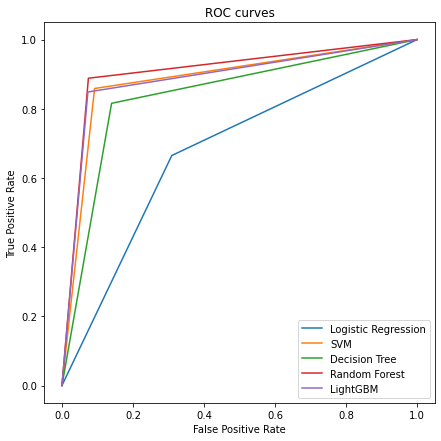

In [20]:
plt.figure(figsize=(7,7))
plt.title("ROC curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

for key, value in model_predictions.items():
    model_list = model_predictions[key]
    plt.plot(model_list[0], model_list[1], label=key)
    plt.legend()
plt.show()

## Model Tuning

In [22]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyper = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(rfor, hyper, cv = 3, verbose = 1, n_jobs = -1)
best = grid.fit(X_train, y_train)

In [242]:
best.best_estimator_

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=300,
                       random_state=8)

********************
**Model Assessment**
********************
score: 0.896

Classification report
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       195
           1       0.88      0.91      0.89       181

    accuracy                           0.90       376
   macro avg       0.90      0.90      0.90       376
weighted avg       0.90      0.90      0.90       376


Confusion Matrix


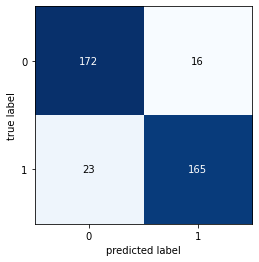

In [23]:
rfor_tune = RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=300,
                       random_state=8)

rfor_tune.fit(X_train, y_train)
predictions = rfor_tune.predict(X_test)

print("*"*20)
print("Model Assessment".center(20, '*'))
print("*"*20)

predictions = rfor_tune.predict(X_test)
print('score: {}'.format(round(rfor_tune.score(X_test, y_test), 3)))
print()

print('Classification report')
print(classification_report(y_test, predictions))

print()

print('Confusion Matrix')
conf_matrix = confusion_matrix(predictions, y_test)
plot_confusion_matrix(conf_matrix);

tpr, fpr, threshold = roc_curve(predictions, y_test, pos_label=1)
model_predictions["Random Forest Tuned"] = [tpr, fpr]

## Conclusion

The best model is the **Random Forest** with a score of **0.907**